In [1]:
import glob
import os

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io
from helpers.cell_type_naming import nice_to_weirds, weird_to_nice

plotly.io.renderers.default = "jupyterlab+png"

# Setup...

## Load sc data

In [2]:
sc_rna_seq = pd.read_csv(
    "/mnt/buckets/liulab/ftp/GSE115978/GSE115978_tpm.csv",
    index_col=0,
).rename_axis(index="GeneSymbol", columns="cells")

g = len(sc_rna_seq)

sc_rna_seq

cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
C9orf152,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RPS11,8.144184,5.915091,7.243164,6.019502,7.974753,5.557257,4.639058,7.655502,3.554834,8.791371,...,8.116349,5.756490,0.000000,5.258820,3.930454,5.945186,6.661408,6.792322,0.000000,4.820741
ELMO2,2.639232,0.000000,0.732052,3.687956,2.599318,1.691087,2.019346,0.136191,0.000000,1.724650,...,1.580145,0.000000,1.075875,0.000000,5.616211,0.000000,0.000000,0.000000,0.000000,6.166655
CREB3L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PNMA1,3.656496,0.000000,0.536053,3.041418,4.132741,2.827006,0.000000,2.873420,0.000000,4.787694,...,0.000000,1.407081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIK3IP1,0.936591,5.761498,0.000000,0.000000,2.034216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.018011,0.000000,1.491597,0.000000,0.000000,4.510139
SNRPD2,5.374866,0.000000,5.437661,6.240581,5.946754,4.628132,4.648580,4.330415,4.559981,5.664966,...,5.350462,0.000000,5.225853,3.966523,5.537203,6.792582,0.000000,0.000000,3.525944,6.218684
SLC39A6,3.326681,0.000000,1.308011,3.516141,3.868390,1.791189,0.000000,2.948601,4.368279,0.000000,...,0.000000,4.774840,4.881518,5.688656,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


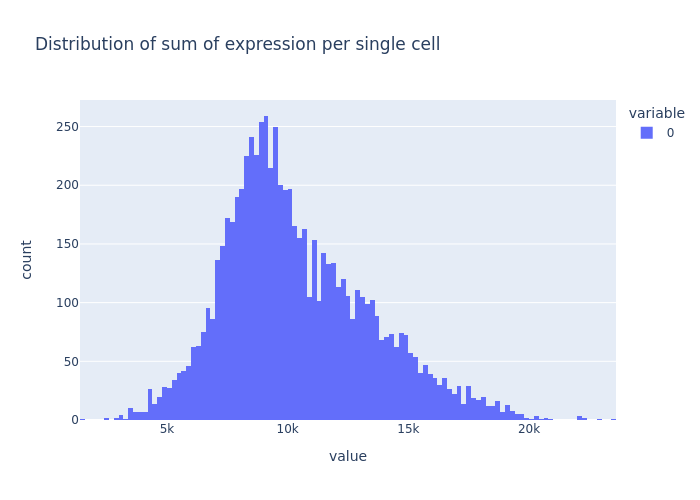

In [3]:
px.histogram(sc_rna_seq.sum(axis='index'), title="Distribution of sum of expression per single cell")

## Select genes to study

From Liu et al, 2019:

"We then examined the expression of antigen-presentation molecules and their association with response. Interestingly, expression of all 13 MHC-II-associated HLA genes was higher in responders (collective two-sided binomial test, P = 0.0002; Fig. 2g), with four genes (HLA-DMA, HLA-DMB, HLA-DOB and HLA-DOB) individually passing a statistical significance threshold (MWW, P < 0.05; Supplementary Table 4)."

What HLA genes are in the Jerby-Arnon cohort?

In [4]:
gene_regex = "HLA-D[MO]"

example_genes = list(sc_rna_seq.index[sc_rna_seq.index.str.match(gene_regex)])

print(example_genes)

sc_rna_seq.loc[example_genes]

['HLA-DOA', 'HLA-DOB', 'HLA-DMA', 'HLA-DMB']


cells,cy78_CD45_neg_1_B04_S496_comb,cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,CY88_5_B10_S694_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,cy78_CD45_neg_3_H06_S762_comb,cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_G01_S73_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D09_S141_comb,CY88_3_D02_S614_comb,cy79_p1_CD45_neg_PDL1_neg_AS_C4_R1_D06_S138_comb,cy53_1_CD45_neg_C06_S318_comb,...,monika_C11_S119_comb_BCD8_3,CY75_1_CD45_CD8_8__S331_comb_BCD8,CY75_1_CD45_CD8_7__S210_comb_BCD8,CY75_1_CD45_CD8_3__S142_comb_BCD8,CY75_1_CD45_CD8_7__S280_comb_BCD8,CY75_1_CD45_CD8_3__S168_comb_BCD8,CY75_1_CD45_CD8_8__S338_comb_BCD8,monika_D7_S132_comb_BCD8_3,CY75_1_CD45_CD8_8__S289_comb_BCD8,CY75_1_CD45_CD8_8__S351_comb_BCD8
GeneSymbol,,,,,,,,,,,,,,,,,,,,,
HLA-DOA,0.178874,0.0,0.422233,0.0,0.329985,0.0,0.0,0.205393,0.0,0.0,...,0.512985,0.0,1.182692,0.0,0.00000,1.198494,0.0,0.321928,0.000000,0.0
HLA-DOB,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0
HLA-DMA,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,3.968552,0.0,4.42304,0.000000,0.0,0.000000,0.000000,0.0
HLA-DMB,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.0,6.34371,0.000000,0.0,0.000000,6.093771,0.0


how often is expression of each HLA gene detected in single cells in the Jerby-Arnon cohort?

In [5]:
(sc_rna_seq.loc[example_genes] != 0).mean(axis=1).sort_values(ascending=False)

GeneSymbol
HLA-DOA    0.604926
HLA-DMA    0.364459
HLA-DMB    0.224603
HLA-DOB    0.090315
dtype: float64

In [6]:
sc_rna_seq.T[example_genes]

GeneSymbol,HLA-DOA,HLA-DOB,HLA-DMA,HLA-DMB
cells,,,,
cy78_CD45_neg_1_B04_S496_comb,0.178874,0.0,0.0,0.000000
cy79_p4_CD45_neg_PDL1_neg_E11_S1115_comb,0.000000,0.0,0.0,0.000000
CY88_5_B10_S694_comb,0.422233,0.0,0.0,0.000000
cy79_p1_CD45_neg_PDL1_pos_AS_C1_R1_F07_S67_comb,0.000000,0.0,0.0,0.000000
cy78_CD45_neg_3_H06_S762_comb,0.329985,0.0,0.0,0.000000
...,...,...,...,...
CY75_1_CD45_CD8_3__S168_comb_BCD8,1.198494,0.0,0.0,0.000000
CY75_1_CD45_CD8_8__S338_comb_BCD8,0.000000,0.0,0.0,0.000000
monika_D7_S132_comb_BCD8_3,0.321928,0.0,0.0,0.000000


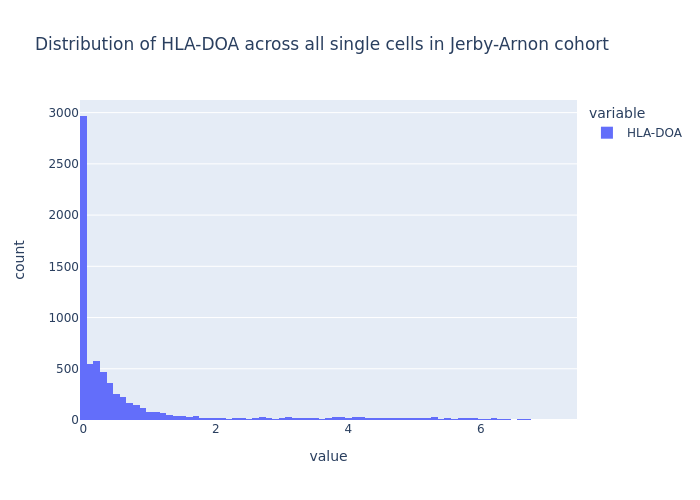

In [7]:
px.histogram(sc_rna_seq.loc["HLA-DOA"], title="Distribution of HLA-DOA across all single cells in Jerby-Arnon cohort")

## load in silico data

In [8]:
# PARAM
results_dir = "./5d_results_noise_0.1"

In [9]:
!ls $results_dir

group_mode  hires


In [10]:
base_path = os.path.abspath(os.path.join(results_dir, "group_mode"))

In [11]:
!tree -h $base_path

/home/jupyter/deconv/5d_results_noise_0.1/group_mode
├── [2.4M]  CIBERSORTxGEP_GEPs.txt
├── [3.2M]  CIBERSORTxGEP_GEPs_CVs.txt
├── [1.5M]  CIBERSORTxGEP_GEPs_Filtered.txt
├── [2.6M]  CIBERSORTxGEP_GEPs_Pvals.txt
├── [1.5M]  CIBERSORTxGEP_GEPs_Qvals.txt
├── [3.1M]  CIBERSORTxGEP_GEPs_StdErrs.txt
├── [581K]  CIBERSORTxGEP_GEPs_ThresholdPlots.pdf
├── [1.5M]  CIBERSORTxGEP_SM_GEPs_Filtered.txt
├── [2.1K]  CIBERSORTxGEP_Weights.txt
├── [1.8K]  fractions_known_and_empty_csx_metrics.txt
└── [4.0K]  in
    ├── [2.2M]  dummy_geps.txt
    └── [9.6M]  mixtures_computed.txt

1 directory, 12 files


### sample mixtures and fractions

In [12]:
mixtures_in_silico = pd.read_csv(
    os.path.join(base_path, "in", "mixtures_computed.txt"),
    sep="\t",
    index_col=0
)

In [13]:
fractions_in_silico = pd.read_csv(
    os.path.join(base_path, "fractions_known_and_empty_csx_metrics.txt"),
    sep="\t",
    index_col=0
).iloc[:, :-3]

### cell-type GEPs per sample

In [28]:
samples = mixtures_in_silico.columns
cell_types = fractions_in_silico.columns

In [29]:
sc_rna_seq_metadata = pd.read_csv(
    "gs://liulab/ftp/GSE115978/GSE115978_cell.annotations.csv",
).replace({"cell.types": weird_to_nice})

In [30]:
cell_type_single_cells = {
    cell_type: sc_rna_seq_metadata.set_index(["cell.types", "cells"]).loc[cell_type].index.tolist()
    for cell_type in cell_types
}

In [31]:
n_cells_per_gep = 5  # PARAM
# note - increasing this param increases the correlation between sample GEPs per cell type

rng = np.random.default_rng(seed=0)

def make_a_cell_type_gep(cell_type, n_cells_per_gep=5):
    # sample with replacement from single cell data
    sampled_cells = rng.choice(cell_type_single_cells[cell_type], n_cells_per_gep)
    gep = sc_rna_seq[sampled_cells].mean(axis='columns')
    gep *= 100000 / gep.sum()
    return gep

sample_cell_type_geps = pd.concat({
    sample: pd.DataFrame({
        cell_type: make_a_cell_type_gep(cell_type, n_cells_per_gep) 
        for cell_type in cell_types
    })
    for sample in samples
}).rename_axis(columns="cell_type")

In [32]:
sample_cell_type_geps

cell_type                      B        CAF  Endothelial  Macrophage  \
           GeneSymbol                                                  
sample_000 C9orf152     0.000000   0.000000     0.000000    0.000000   
           RPS11       93.816258  53.313483    53.516824   63.651543   
           ELMO2        8.408418   4.196476     0.000000    9.479460   
           CREB3L1      0.000000   3.528394     0.000000    0.000000   
           PNMA1        0.000000   7.129496     0.000000   10.595397   
...                          ...        ...          ...         ...   
sample_029 PIK3IP1     14.086623  11.537527     1.941020   11.932031   
           SNRPD2      38.588746  48.371906    27.693911   25.440473   
           SLC39A6     15.867258   3.433097    13.294593    5.027757   
           CTSC        10.240878  31.241877    21.245826   51.706850   
           AQP7         0.000000   0.000000     0.000000    0.000000   

cell_type              Malignant         NK      T CD4      T CD8     T.cell  
           GeneSymbol                                                         
sample_000 C9orf152     0.000000   0.000000   0.000000   0.000000   0.000000  
           RPS11       47.819273  68.389910  80.802680  70.155542  80.431608  
           ELMO2        8.411707   4.012140   0.000000   0.000000   0.000000  
           CREB3L1      0.000000   0.000000   0.000000   0.000000   0.000000  
           PNMA1        6.471376   0.000000  21.576479   0.000000   0.000000  
...                          ...        ...        ...        ...        ...  
sample_029 PIK3IP1      0.000000  22.955072  38.860812  36.391187  41.447119  
           SNRPD2      37.252476  38.015366  26.080351  29.276720  41.034789  
           SLC39A6     20.387911   3.390445   0.000000   0.000000   0.000000  
           CTSC        16.419607  28.393318  17.280948  16.205685  28.585366  
           AQP7         0.000000   0.000000   0.000000   0.000000   0.000000  

[710580 rows x 9 columns]

# Imputation of "global" gene expression by cell type

## Estimated by CIBERSORTx

In [33]:
example_genes_csx = list(_.replace("-", ".") for _ in example_genes)
example_genes_csx

['HLA.DOA', 'HLA.DOB', 'HLA.DMA', 'HLA.DMB']

### p-values, q-values by cell type

In [34]:
pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs_Pvals.txt"),
    sep="\t",
    index_col=0,
).loc[example_genes_csx]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DOA,0.004223,0.809326,0.522368,0.050274,1.000000,0.234890,0.717596,0.461089,0.364638
HLA.DOB,0.086929,0.679690,0.730574,0.965644,1.000000,0.812246,1.000000,1.000000,0.288650
HLA.DMA,0.003446,0.821615,0.416021,0.014218,0.851317,0.344942,0.855929,0.428949,0.739887
HLA.DMB,0.006513,0.969370,0.187138,0.010728,1.000000,0.381585,0.851076,0.621777,1.000000


In [35]:
pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs_Qvals.txt"),
    sep="\t",
    index_col=0,
).loc[example_genes_csx]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DOA,0.154925,1.0,1.000000,0.768985,1.0,0.649099,1.0,1.0,1.0
HLA.DOB,0.528432,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0
HLA.DMA,0.144319,1.0,1.000000,0.566817,1.0,0.819401,1.0,1.0,1.0
HLA.DMB,0.173683,1.0,0.691925,0.544970,1.0,0.872342,1.0,1.0,1.0


### GEPs

In [36]:
imputed_geps_csx = pd.read_csv(
    os.path.join(base_path, "CIBERSORTxGEP_GEPs.txt"),
    sep="\t",
    index_col=0,
)

In [37]:
imputed_geps_csx.loc[example_genes_csx]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA.DOA,22.388972,2.098363,4.208537,18.594706,0.000000,5.916037,2.630122,4.130085,7.990170
HLA.DOB,16.110483,4.621859,2.901998,0.501659,0.000000,1.495760,0.000000,0.000000,12.066656
HLA.DMA,67.267539,5.734367,15.699034,70.011753,4.437992,13.670652,3.857149,12.977000,8.484761
HLA.DMB,50.032133,0.792056,20.937455,59.505582,0.000000,10.262373,3.236992,6.537755,0.000000


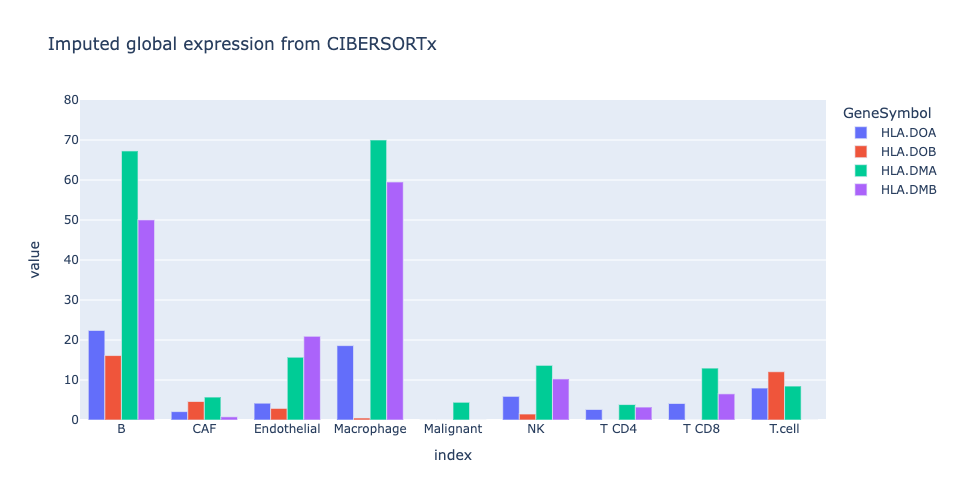

In [38]:
fig = px.bar(imputed_geps_csx.loc[example_genes_csx].T, barmode='group', title="Imputed global expression from CIBERSORTx")
fig.update_yaxes(range=[0, 80])

## Estimated by scipy.optimize.nnls

In [39]:
import scipy.optimize

In [40]:
%%time

dict_imputed_geps_scipy = {
    gene: scipy.optimize.nnls(A=fractions_in_silico, b=mixtures_in_silico.loc[gene])[0]
    for gene in mixtures_in_silico.index
}

imputed_geps_scipy = pd.DataFrame.from_dict(
    dict_imputed_geps_scipy,
    orient='index',
    columns=fractions_in_silico.columns
)

CPU times: user 2.75 s, sys: 40.8 ms, total: 2.79 s
Wall time: 2.75 s


In [41]:
imputed_geps_scipy.loc[example_genes]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
HLA-DOA,23.999205,0.519279,4.499420,20.609175,0.000000,6.214035,3.251619,4.370007,8.344816
HLA-DOB,17.447250,5.454904,3.410829,0.000000,0.000000,1.434219,0.000000,0.000000,11.493510
HLA-DMA,68.852642,5.663225,14.594620,70.848503,2.055632,14.791754,5.769766,13.934691,8.894644
HLA-DMB,49.323083,1.396875,20.532011,59.273551,0.000000,9.730549,2.828330,5.874194,0.000000


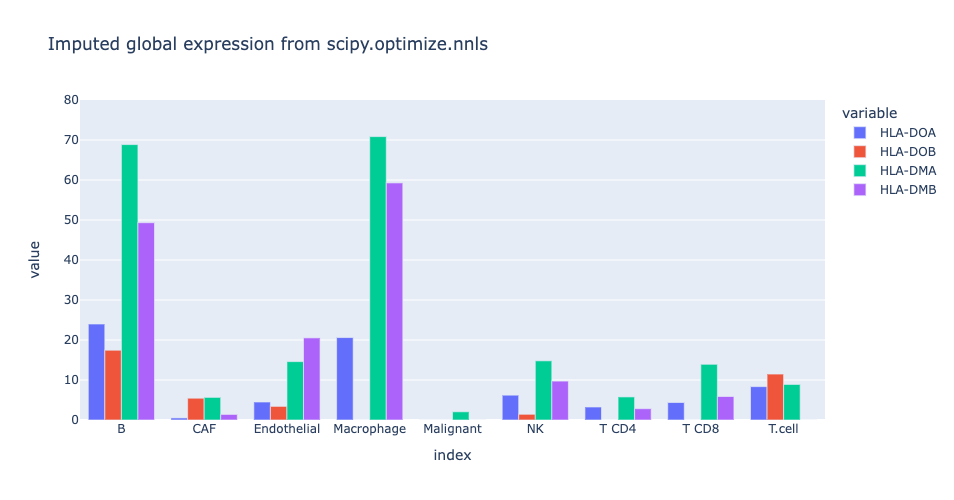

In [42]:
fig = px.bar(imputed_geps_scipy.loc[example_genes].T, barmode='group', title="Imputed global expression from scipy.optimize.nnls")
fig.update_yaxes(range=[0, 80])

## Estimated by numpy.linalg.lstsq

In [43]:
%%time

dict_imputed_geps_numpy_lstsq = {
    gene: np.linalg.lstsq(a=fractions_in_silico, b=mixtures_in_silico.loc[gene])[0]
    for gene in mixtures_in_silico.index
}

imputed_geps_numpy_lstsq = pd.DataFrame.from_dict(
    dict_imputed_geps_numpy_lstsq,
    orient='index',
    columns=fractions_in_silico.columns
)

imputed_geps_numpy_lstsq = imputed_geps_numpy_lstsq.clip(lower=0)

CPU times: user 5.46 s, sys: 383 ms, total: 5.85 s
Wall time: 5.27 s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

`rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.



In [44]:
imputed_geps_numpy_lstsq.loc[example_genes]

,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
HLA-DOA,24.134946,0.000000,4.853667,21.087103,0.000000,6.422988,4.021744,4.571416,8.578368
HLA-DOB,19.558380,3.427900,4.437383,3.429400,0.000000,2.974731,0.000000,0.000000,13.627109
HLA-DMA,68.852642,5.663225,14.594620,70.848503,2.055632,14.791754,5.769766,13.934691,8.894644
HLA-DMB,51.036187,3.636339,21.370703,58.325804,0.000000,10.805237,4.667147,7.089645,0.000000


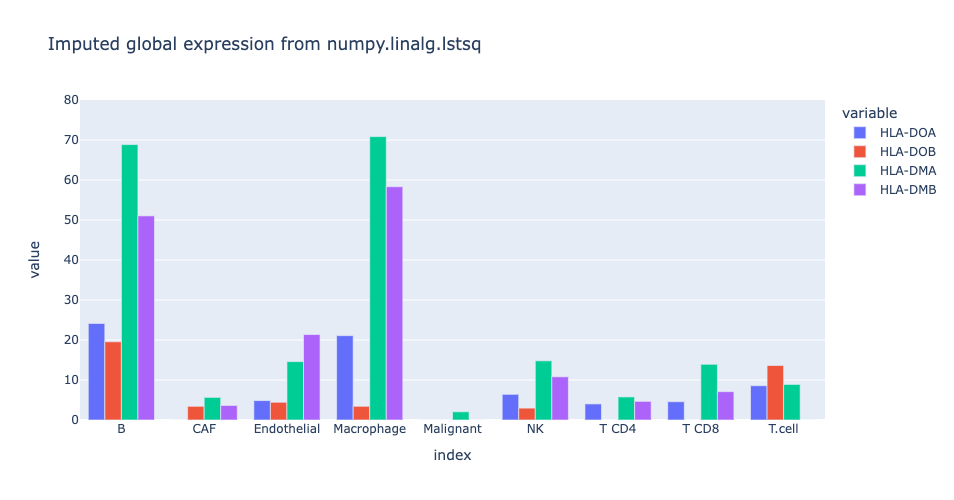

In [45]:
fig = px.bar(imputed_geps_numpy_lstsq.loc[example_genes].T, barmode='group', title="Imputed global expression from numpy.linalg.lstsq")
fig.update_yaxes(range=[0, 80])

## True (average cell type GEP per sample)

In [46]:
true_geps_on_average = sample_cell_type_geps.groupby(level=1).mean()

In [48]:
true_geps_on_average.loc[example_genes]

cell_type,B,CAF,Endothelial,Macrophage,Malignant,NK,T CD4,T CD8,T.cell
GeneSymbol,,,,,,,,,
HLA-DOA,27.535873,1.613247,5.596827,21.004637,1.399704,3.577960,3.972066,6.549869,4.773955
HLA-DOB,30.914944,0.345627,0.508466,3.167582,0.159910,0.000000,0.232382,0.359031,1.845849
HLA-DMA,57.434801,2.775466,17.955044,56.942723,4.883612,11.770307,9.059162,22.435952,12.741286
HLA-DMB,53.885710,0.681306,7.205895,54.060192,1.134609,8.888966,1.826870,8.444890,4.055356


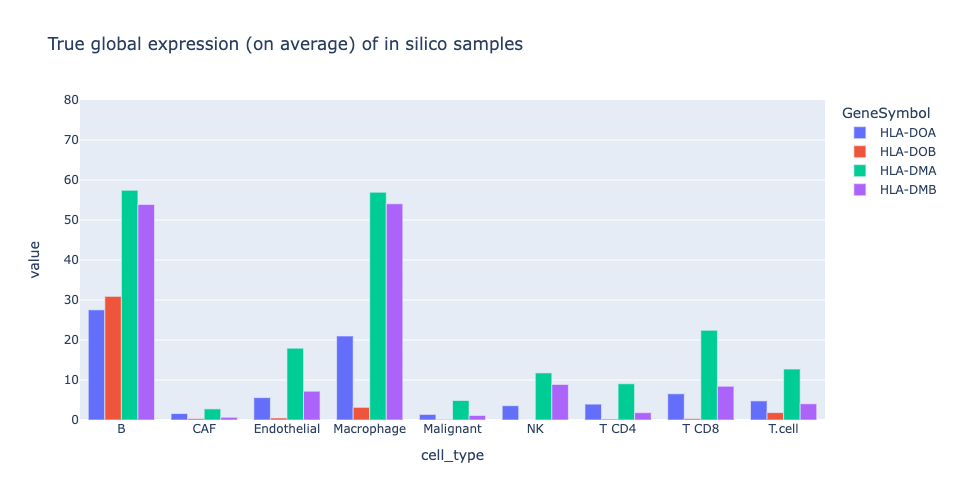

In [49]:
fig = px.bar(true_geps_on_average.loc[example_genes].T, barmode='group', title="True global expression (on average) of in silico samples")
fig.update_yaxes(range=[0, 80])

In [ ]:
# cell_type_geps_imputed_global["gene_name_sc"] = list(sorted(sc_rna_seq.index))
# not_the_same = cell_type_geps_imputed_global["gene_name_sc"] != cell_type_geps_imputed_global["GeneSymbol"]

In [ ]:
# # cell_type_geps_imputed_global.loc[not_the_same][["GeneSymbol", "gene_name_sc"]]
# cell_type_geps_imputed_global.loc[
#     cell_type_geps_imputed_global["GeneSymbol"] \
#     == cell_type_geps_imputed_global["gene_name_sc"]
# ][["GeneSymbol", "gene_name_sc"]].sample(20).sort_values(by="GeneSymbol")

In [ ]:
# cell_type_geps_imputed_global["gene_name"].sample(50).sort_values()

# Imputing sample-level cell type GEPs

In [ ]:
base_path = os.path.abspath(os.path.join(results_dir, "hires"))

In [ ]:
!tree -h $base_path

In [ ]:
inferred_cell_type_geps = dict()

for path in glob.glob(os.path.join(base_path, "CIBERSORTxHiRes_NA_*_Window*txt")):
    file = os.path.basename(path)
    cell_type = file.split("_")[2]
    print(cell_type)
    df = pd.read_csv(path, sep="\t", index_col=0).rename_axis(columns="sample")
    inferred_cell_type_geps[cell_type] = df

all_inferred_geps = \
    pd.concat(inferred_cell_type_geps, names=["cell_type"])\
    .stack()\
    .reset_index()\
    .set_index(['sample', 'GeneSymbol', 'cell_type'])\
    .unstack(level=-1)[0]\
    .rename(columns=weird_to_nice)


In [ ]:
all_inferred_geps